# ING Lion's Den 2024


## Team: RiskBusters

 Michał Bryzik, Michał Niegierewicz, Kacper Gruca, Jan Ślusarek

Plan dzialania: (Jbc to kazdy podaje tu swoje propozycje, jak sie kto z czym np. niezgadza niech napisze w nawiasie)

1. Wczytac dane i szybko je opisac liczebnosc nulle itd. 
2. Ja bym tutaj posortowal zmienne w macierzy tzn. kolumna 1-16 numeryczne a od 17-do konca binarne
3. Wlasciwe czyszczenie danych, elminacja, aproksymacja, asocjacja itd.
4. Statystyki opisowe, wykresy (rozklady, heatmapy, boxploty itd. )
5. Transformacja danych MinMax, standaryzacja itd. (ogolnie manipulacja tak zeby w razie czego logit byl jak najbardziej dojebany)
6. Trenowanie Logita
7. Wybor najlepszego i sprawdzenie z zalozeniami 

In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [70]:
data=pd.read_csv('../data/input/development_sample.csv') 
data.head() 

,ID,customer_id,application_date,target,Application_status,Var1,Var2,Var3,Var4,Var5,...,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,_r_
0,11034977,32537148,01Feb2010 0:00:00,0.0,Approved,1,2.0,1,7800,99,...,1,1,0,6768.42,0.00,0,0,0,3899,0.267045
1,11034978,32761663,01Feb2010 0:00:00,0.0,Approved,1,1.0,2,11100,78,...,0,0,15000,5937.66,3870.60,0,0,0,3899,0.533040
2,11034979,32701063,01Feb2010 0:00:00,0.0,Approved,2,3.0,1,2400,15,...,2,2,0,5647.77,1463.08,0,0,10,3899,0.861555
3,11034980,32386786,01Feb2010 0:00:00,0.0,Approved,3,1.0,2,11800,30,...,0,0,0,3594.90,21563.78,0,0,10,3899,0.506451
4,11034981,32692110,02Feb2010 0:00:00,NaN,Rejected,1,2.0,1,10200,72,...,2,2,0,9908.45,0.00,0,0,20,3899,0.210913


In [71]:
data.shape 

(50000, 36)

In [72]:
data.isnull().sum() 

ID                        0
customer_id               0
application_date          0
target                13282
Application_status        0
Var1                      0
Var2                   1403
Var3                   1403
Var4                      0
Var5                      0
Var6                      0
Var7                      0
Var8                  29173
Var9                      0
Var10                 37538
Var11                     0
Var12                 37538
Var13                     0
Var14                     0
Var15                     0
Var16                     0
Var17                    40
Var18                 37416
Var19                 29173
Var20                     0
Var21                     0
Var22                     0
Var23                     0
Var24                     0
Var25                 10088
Var26                 19883
Var27                     0
Var28                     0
Var29                     0
Var30                     0
_r_                 

In [73]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  50000 non-null  int64  
 1   customer_id         50000 non-null  int64  
 2   application_date    50000 non-null  object 
 3   target              36718 non-null  float64
 4   Application_status  50000 non-null  object 
 5   Var1                50000 non-null  int64  
 6   Var2                48597 non-null  float64
 7   Var3                48597 non-null  object 
 8   Var4                50000 non-null  int64  
 9   Var5                50000 non-null  int64  
 10  Var6                50000 non-null  int64  
 11  Var7                50000 non-null  float64
 12  Var8                20827 non-null  float64
 13  Var9                50000 non-null  int64  
 14  Var10               12462 non-null  float64
 15  Var11               50000 non-null  int64  
 16  Var1

## Clean dataset

### Define columns by datetypes and sort df

We define the target type of the column basing on the description file and exploring data

In [74]:
# Define columns
date_columns = ['application_date', 'Var13'] 
numeric_columns = ['ID', 'customer_id', '_r_', 'Var9', 'Var10']  
categorical_columns = []
binary_columns = ['target', 'Application_status'] 

In [75]:
# Checking the data type for the rest of columns 
for column in data.columns:
    if column in date_columns + numeric_columns + binary_columns:
        continue  
    elif column in ['Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var15', 'Var16', 'Var17', 'Var20', 'Var21', 'Var22', 'Var23', 'Var24', 'Var25', 'Var26', 'Var29', 'Var30']:
        numeric_columns.append(column)
    elif column in ['Var2', 'Var3', 'Var11', 'Var12', 'Var14']:
        categorical_columns.append(column)
    elif column in ['Var18', 'Var19', 'Var27', 'Var28']:
        binary_columns.append(column)

In [76]:
print(date_columns)
print(numeric_columns)
print(categorical_columns)
print(binary_columns)

['application_date', 'Var13']
['ID', 'customer_id', '_r_', 'Var9', 'Var10', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var15', 'Var16', 'Var17', 'Var20', 'Var21', 'Var22', 'Var23', 'Var24', 'Var25', 'Var26', 'Var29', 'Var30']
['Var2', 'Var3', 'Var11', 'Var12', 'Var14']
['target', 'Application_status', 'Var18', 'Var19', 'Var27', 'Var28']


In [77]:
# Make a copy of main data, from this moment we will work on this dataset
df = data.copy()

In [78]:
# Assumed sequence for columns sorting 
sorted_columns = date_columns + numeric_columns + categorical_columns + binary_columns

# Choose of the sorted value by defined categories
df = data[sorted_columns]

In [79]:
df.head()
# Some of the records for Var14 are Nulls, it requires analysis

,application_date,Var13,ID,customer_id,_r_,Var9,Var10,Var1,Var4,Var5,...,Var3,Var11,Var12,Var14,target,Application_status,Var18,Var19,Var27,Var28
0,01Feb2010 0:00:00,26Nov2004,11034977,32537148,0.267045,5640,NaN,1,7800,99,...,1,5,NaN,2,0.0,Approved,1.0,NaN,0,0
1,01Feb2010 0:00:00,16Sep1996,11034978,32761663,0.533040,3000,NaN,1,11100,78,...,2,2,NaN,4,0.0,Approved,NaN,1.0,0,0
2,01Feb2010 0:00:00,06May1989,11034979,32701063,0.861555,6240,4300.0,2,2400,15,...,1,5,5.0,1,0.0,Approved,NaN,NaN,0,0
3,01Feb2010 0:00:00,06Dec1987,11034980,32386786,0.506451,4560,2500.0,3,11800,30,...,2,6,5.0,1,0.0,Approved,NaN,0.0,0,0
4,02Feb2010 0:00:00,18May1989,11034981,32692110,0.210913,5160,NaN,1,10200,72,...,1,5,NaN,0,NaN,Rejected,1.0,NaN,0,0


### Handle date variables

In [80]:
# Print date columns
date_columns

['application_date', 'Var13']

#### Change the type of columns

In [81]:
# Change date columns to datetime type
df['application_date'] = pd.to_datetime(df['application_date'], errors='coerce')
df['Var13'] = pd.to_datetime(df['Var13'], format='%d%b%Y', errors='coerce')         # Var13 - irregular date format

In [82]:
# Check naN values after transformation
print(df['Var13'].isnull().sum(0))
print(df['application_date'].isnull().sum(0))

784
0


After transformation some records for Var13 are empty, we need to analyze it

In [83]:
df.head()

,application_date,Var13,ID,customer_id,_r_,Var9,Var10,Var1,Var4,Var5,...,Var3,Var11,Var12,Var14,target,Application_status,Var18,Var19,Var27,Var28
0,2010-02-01,2004-11-26,11034977,32537148,0.267045,5640,NaN,1,7800,99,...,1,5,NaN,2,0.0,Approved,1.0,NaN,0,0
1,2010-02-01,1996-09-16,11034978,32761663,0.533040,3000,NaN,1,11100,78,...,2,2,NaN,4,0.0,Approved,NaN,1.0,0,0
2,2010-02-01,1989-05-06,11034979,32701063,0.861555,6240,4300.0,2,2400,15,...,1,5,5.0,1,0.0,Approved,NaN,NaN,0,0
3,2010-02-01,1987-12-06,11034980,32386786,0.506451,4560,2500.0,3,11800,30,...,2,6,5.0,1,0.0,Approved,NaN,0.0,0,0
4,2010-02-02,1989-05-18,11034981,32692110,0.210913,5160,NaN,1,10200,72,...,1,5,NaN,0,NaN,Rejected,1.0,NaN,0,0


#### Analyze Var13

In [84]:
# Check indexes where conversion caused 'NaT' values
nan_indices = df['Var13'].isna()

# Compare original values of 'Var13' which after conversion became 'NaT'
original_values_with_nan = data.loc[nan_indices, 'Var13']

original_values_with_nan

5        31Dec9999
56       31Dec9999
67       31Dec9999
86       31Dec9999
95       31Dec9999
           ...    
49510    31Dec9999
49537    31Dec9999
49617    31Dec9999
49635    31Dec9999
49765    31Dec9999
Name: Var13, Length: 784, dtype: object

In [85]:
# Check unique values of 'Var13' which after conversion became 'NaT'
original_values_with_nan.unique()

array(['31Dec9999'], dtype=object)

Summarizing we have 784 cases in Var13 with value '31Dec9999'

We treat them as data error and for this moment leave with NAs

### Create working_months column

Var13 = employment date

working_moths = Var13 - application_date


We would like to calculate the number of working months before applying for credit, which will indicate the employee's duration at the given position from employment to loan application.

NAs from Var13 are replaced with 0

We also want to have this column first

In [86]:
# Create a new colum working_months
df['working_months'] = ((df['application_date'] - df['Var13']) / np.timedelta64(1, 'M')).fillna(0).astype(int)

# Delete columns 'application_date' and 'Var13'
df.drop(['application_date', 'Var13'], axis=1, inplace=True)

In [87]:
df.head()

,ID,customer_id,_r_,Var9,Var10,Var1,Var4,Var5,Var6,Var7,...,Var11,Var12,Var14,target,Application_status,Var18,Var19,Var27,Var28,working_months
0,11034977,32537148,0.267045,5640,NaN,1,7800,99,1,108.73,...,5,NaN,2,0.0,Approved,1.0,NaN,0,0,62
1,11034978,32761663,0.533040,3000,NaN,1,11100,78,1,195.99,...,2,NaN,4,0.0,Approved,NaN,1.0,0,0,160
2,11034979,32701063,0.861555,6240,4300.0,2,2400,15,1,248.34,...,5,5.0,1,0.0,Approved,NaN,NaN,0,0,248
3,11034980,32386786,0.506451,4560,2500.0,3,11800,30,6,3538.68,...,6,5.0,1,0.0,Approved,NaN,0.0,0,0,265
4,11034981,32692110,0.210913,5160,NaN,1,10200,72,3,580.26,...,5,NaN,0,NaN,Rejected,1.0,NaN,0,0,248


Move 'working_months' to the first column

In [88]:
# Create a list of columns without 'working_months'
df_sorted_columns = df.columns.tolist()
df_sorted_columns.remove('working_months')
# Add 'working_months' to the first position
df_sorted_columns.insert(0, 'working_months')
# Reindex columns
df = df[df_sorted_columns]

In [89]:
df.head()

,working_months,ID,customer_id,_r_,Var9,Var10,Var1,Var4,Var5,Var6,...,Var3,Var11,Var12,Var14,target,Application_status,Var18,Var19,Var27,Var28
0,62,11034977,32537148,0.267045,5640,NaN,1,7800,99,1,...,1,5,NaN,2,0.0,Approved,1.0,NaN,0,0
1,160,11034978,32761663,0.533040,3000,NaN,1,11100,78,1,...,2,2,NaN,4,0.0,Approved,NaN,1.0,0,0
2,248,11034979,32701063,0.861555,6240,4300.0,2,2400,15,1,...,1,5,5.0,1,0.0,Approved,NaN,NaN,0,0
3,265,11034980,32386786,0.506451,4560,2500.0,3,11800,30,6,...,2,6,5.0,1,0.0,Approved,NaN,0.0,0,0
4,248,11034981,32692110,0.210913,5160,NaN,1,10200,72,3,...,1,5,NaN,0,NaN,Rejected,1.0,NaN,0,0


### Handle binary variables

Convert the 'Application_status' column to binary variables to facilitate analysis. Applications marked as 'Approved' are changed to 1, and those marked as 'Rejected' are changed to 0. This conversion simplifies the analysis process, allowing for straightforward interpretation of application outcomes

In [90]:
# Check unique values for binary columns
for column in binary_columns:
    print(f"Unique values for column '{column}': {df[column].unique()}")

Unique values for column 'target': [ 0. nan  1.]
Unique values for column 'Application_status': ['Approved' 'Rejected']
Unique values for column 'Var18': [ 1. nan  0.]
Unique values for column 'Var19': [nan  1.  0.]
Unique values for column 'Var27': [0 1]
Unique values for column 'Var28': [0 1]


As we can observe column "Application_status" needs to be modified

In [91]:
# Change value "Approved" to 1 and "Rejected" to 0 in column 'Application_status'
df['Application_status'] = df['Application_status'].replace({'Approved': 1, 'Rejected': 0})

In [92]:
# Check the first few rows of the 'Application_status' column to ensure the conversion has been applied correctly.
df[['Application_status']].head()

,Application_status
0,1
1,1
2,1
3,1
4,0


### Handle categorical variables - one hot encoding

In [93]:
# Check unique values for binary columns
for column in categorical_columns:
    print(f"Unique values for column '{column}': {df[column].unique()}")

Unique values for column 'Var2': [ 2.  1.  3. nan]
Unique values for column 'Var3': ['1' '2' nan 'Direct' '3' 'Online']
Unique values for column 'Var11': [5 2 6 4 3 1 7]
Unique values for column 'Var12': [nan  5.  2.  4.  6.  7.  3.  1.]
Unique values for column 'Var14': [2 4 1 0 3]


In [94]:
# Apply one-hot encoding to the specified categorical nominal variables in the 'sorted_data' DataFrame.
# The variables identified for this encoding are: Var2, Var3, Var11, Var12, and Var14.
# One-hot encoding converts these categorical variables into a form that could be provided to ML algorithms
# to do a better job in prediction. It creates binary columns for each category/value in the original columns
# and assigns a 1 or 0 (presence or absence) in those newly created binary columns.

# The 'pd.get_dummies()' function is used here to perform one-hot encoding on the specified columns.
# It automatically generates new columns for each unique value in the specified categorical columns,
# effectively transforming them into a format that's suitable for modeling.
sorted_data_encoded = pd.get_dummies(df, columns=['Var2', 'Var3', 'Var11', 'Var12', 'Var14'])

# Display the first few rows of the DataFrame to check the results of the encoding.
# This step allows us to verify that the one-hot encoding process has successfully transformed the specified
# categorical variables into a set of binary variables, each representing a unique category within the original variables.
sorted_data_encoded.head()



,working_months,ID,customer_id,_r_,Var9,Var10,Var1,Var4,Var5,Var6,...,Var12_3.0,Var12_4.0,Var12_5.0,Var12_6.0,Var12_7.0,Var14_0,Var14_1,Var14_2,Var14_3,Var14_4
0,62,11034977,32537148,0.267045,5640,NaN,1,7800,99,1,...,0,0,0,0,0,0,0,1,0,0
1,160,11034978,32761663,0.533040,3000,NaN,1,11100,78,1,...,0,0,0,0,0,0,0,0,0,1
2,248,11034979,32701063,0.861555,6240,4300.0,2,2400,15,1,...,0,0,1,0,0,0,1,0,0,0
3,265,11034980,32386786,0.506451,4560,2500.0,3,11800,30,6,...,0,0,1,0,0,0,1,0,0,0
4,248,11034981,32692110,0.210913,5160,NaN,1,10200,72,3,...,0,0,0,0,0,1,0,0,0,0


### Null analysis per ID 

In [95]:
# First, we create a copy of our DataFrame and set the 'ID' column as the index. This step makes it easier to perform operations
# that are specific to each record based on its unique identifier.
data_l = data.copy()
data_l.set_index('ID', inplace=True)

# Next, we calculate the number of null values in each row. We also list the columns that contain these nulls.
# This is done by applying a lambda function across each row (axis=1), which sums up the nulls (`x.sum()`)
# and identifies which columns they are in (`list(data_l.columns[x])`). The results are stored in a Series
# with two indices: 'Null_Count' for the number of nulls, and 'Null_Columns' for the specific columns with null values.
null_analysis_per_id = data_l.isnull().apply(lambda x: pd.Series([x.sum(), list(data_l.columns[x])], index=['Null_Count', 'Null_Columns']), axis=1)

# Display the analysis results. This provides insight into how null values are distributed across the dataset,
# including which records are affected and how.
null_analysis_per_id

# A potential issue arises when dealing with one-hot encoding of nominal categorical variables that had no missing values.
# During one-hot encoding, these variables are transformed such that each category becomes a separate column,
# with rows marked as 0 to indicate the absence of that category. This automatic conversion to 0 for all categories
# in a one-hot encoded scheme can lead to misinterpretation when assessing null values.
# Moreover, it's noted that every record in the dataset has at least one null value, which complicates the analysis
# of data completeness and requires careful consideration when preparing the data for modeling or analysis.

# This highlights the importance of understanding how different data preprocessing steps, like one-hot encoding,
# can affect the interpretation of null values in the dataset. It's crucial to distinguish between genuinely missing values
# and the artificial zeros introduced by one-hot encoding, as they represent different aspects of the data.

,Null_Count,Null_Columns
ID,,
11034977,4,"[Var8, Var10, Var12, Var19]"
11034978,3,"[Var10, Var12, Var18]"
11034979,3,"[Var8, Var18, Var19]"
11034980,1,[Var18]
11034981,5,"[target, Var8, Var10, Var12, Var19]"
...,...,...
11084972,3,"[Var18, Var25, Var26]"
11084973,7,"[target, Var8, Var10, Var12, Var19, Var25, Var26]"
11084974,3,"[Var10, Var12, Var18]"


<Axes: xlabel='Null_Count', ylabel='Count'>

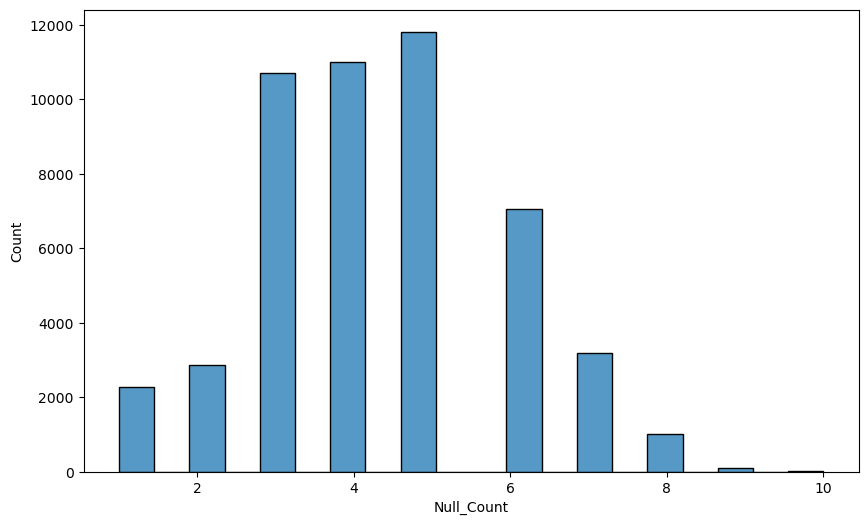

In [96]:
# histogram of the number of missing values per record
plt.figure(figsize=(10, 6))
sns.histplot(null_analysis_per_id['Null_Count'], bins=20, kde=False)

### Data cleaning for numeric data types 

In [97]:
# Convert binary variables to the 'Int8' data type, which supports null values.
# This step is important for maintaining data integrity, as 'Int8' allows for binary data to include
# missing values, offering a more accurate representation of the dataset where nulls are meaningful.
binary_cols = ['target','Application_status', 'Var18', 'Var19', 'Var27', 'Var28']
sorted_data_encoded[binary_cols] = sorted_data_encoded[binary_cols].astype('Int8')

# Save the original data types of the DataFrame. This is crucial for restoring the DataFrame's data types
# after imputation since KNNImputer will convert the imputed data to float64 by default.
original_dtypes = sorted_data_encoded.dtypes

# Initialize the KNNImputer. The default setting uses 5 nearest neighbors to impute missing values,
# which is a balance between accuracy and computational efficiency.
knn_imputer = KNNImputer()

# Replace 0s with NaNs in the 'working_months' column if necessary. This step is preparatory for imputation,
# ensuring that 0s, which may signify missing or unrecorded data, are correctly treated as missing values.
sorted_data_encoded['working_months'] = sorted_data_encoded['working_months'].replace(0, np.nan)

# Select only numerical columns from the DataFrame for imputation. KNNImputer works with numerical data,
# so identifying these columns is a prerequisite for the imputation process.
numerical_cols = sorted_data_encoded.select_dtypes(include=['int64', 'float64', 'int32']).columns

# Perform the imputation using KNN. This process fills in missing values based on the mean of the
# nearest neighbors found in the multidimensional space, providing a reasonable estimate for missing data.
imputed_data = knn_imputer.fit_transform(sorted_data_encoded[numerical_cols])

# Convert the imputed array back into a DataFrame, preserving the original index. This step ensures that
# the imputed data retains the structure and index of the original DataFrame for consistency and ease of analysis.
imputed_df = pd.DataFrame(imputed_data, columns=numerical_cols, index=sorted_data_encoded.index)

# Restore the original data types. After imputation, it's important to convert the data back to its
# original types for accurate analysis and consistency with the rest of the dataset.
for col in numerical_cols:
    if original_dtypes[col].kind in 'iu':  # Check if the data type is integer
        imputed_df[col] = imputed_df[col].round().astype(original_dtypes[col])
    else:  # For floating-point types, retain as is
        imputed_df[col] = imputed_df[col].astype(original_dtypes[col])

# Update the original 'sorted_data_encoded' DataFrame with the imputed data. This final step integrates
# the imputed numerical data back into the main DataFrame, completing the imputation process.
sorted_data_encoded.update(imputed_df)

# Display the DataFrame information to check the results of the imputation and data type restoration.
# This overview allows for a quick verification that the dataset is now complete with imputed values
# and that all columns are of their appropriate data types.
sorted_data_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   working_months      50000 non-null  float64
 1   ID                  50000 non-null  int64  
 2   customer_id         50000 non-null  int64  
 3   _r_                 50000 non-null  float64
 4   Var9                50000 non-null  int64  
 5   Var10               50000 non-null  float64
 6   Var1                50000 non-null  int64  
 7   Var4                50000 non-null  int64  
 8   Var5                50000 non-null  int64  
 9   Var6                50000 non-null  int64  
 10  Var7                50000 non-null  float64
 11  Var8                50000 non-null  float64
 12  Var15               50000 non-null  int64  
 13  Var16               50000 non-null  int64  
 14  Var17               50000 non-null  float64
 15  Var20               50000 non-null  int64  
 16  Var2

### Data cleaning for binary data types (not for one hot encoding nominal categorical variables, after decomposition)

In [98]:
binary_columns

['target', 'Application_status', 'Var18', 'Var19', 'Var27', 'Var28']

In [99]:
# Handling missing values in binary columns
# This section focuses on imputing missing values in binary variables using the mode.
# The mode is the most common value in a distribution, making it a suitable choice for imputing
# binary variables as it reflects the predominant category.


# Loop through each binary column to perform mode imputation.
for col in binary_columns:
    # Calculate the mode for each binary column. The 'dropna=True' parameter ensures that missing values
    # are not considered when determining the mode. '[0]' is used to select the first mode in case there
    # are multiple modes with the same frequency.
    mode_value = sorted_data_encoded[col].mode(dropna=True)[0]
    
    # Impute missing values with the mode. The 'fillna()' function replaces all NaNs in the column with
    # the mode value calculated previously. 'inplace=True' modifies the original DataFrame directly,
    # saving the need to create a copy or reassign the DataFrame.
    sorted_data_encoded[col].fillna(mode_value, inplace=True)

# After imputing missing values in the binary columns, it's a good practice to verify the changes.
# Checking that there are no more missing values in these columns can be done through the 'info()' method
# or specifically checking for nulls using 'isnull().sum()' on the binary columns.

In [100]:
sorted_data_encoded

,working_months,ID,customer_id,_r_,Var9,Var10,Var1,Var4,Var5,Var6,...,Var12_3.0,Var12_4.0,Var12_5.0,Var12_6.0,Var12_7.0,Var14_0,Var14_1,Var14_2,Var14_3,Var14_4
0,62.0,11034977,32537148,0.267045,5640,3180.0,1,7800,99,1,...,0,0,0,0,0,0,0,1,0,0
1,160.0,11034978,32761663,0.533040,3000,3360.0,1,11100,78,1,...,0,0,0,0,0,0,0,0,0,1
2,248.0,11034979,32701063,0.861555,6240,4300.0,2,2400,15,1,...,0,0,1,0,0,0,1,0,0,0
3,265.0,11034980,32386786,0.506451,4560,2500.0,3,11800,30,6,...,0,0,1,0,0,0,1,0,0,0
4,248.0,11034981,32692110,0.210913,5160,3880.0,1,10200,72,3,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,153.0,11084972,32554904,0.783954,6240,11900.0,2,49200,111,1,...,0,0,1,0,0,1,0,0,0,0
49996,265.0,11084973,32884069,0.172590,23640,6840.0,1,25600,30,1,...,0,0,0,0,0,1,0,0,0,0
49997,170.0,11084974,32433438,0.060722,24840,12140.0,1,46700,18,1,...,0,0,0,0,0,1,0,0,0,0
49998,50.0,11084975,32877592,0.845866,20400,9700.0,1,44300,162,3,...,0,0,0,0,0,1,0,0,0,0


### Data cleaning for nominal categorical variables, after one-hot encoding decomposition 

In [101]:
# Pomysl taki wsrod tych zmiennych kategorycznych ktore maja malo nulli około ledwie pare % 
# To usuwamy, zas te co maja duza liczbe nulli , to nulle traktujemy jako osobna kategorie 
# Brak wartosci tez jest w koncu wartoscia 


# Problem natury programistycznej, te zmienne ktore maja nulle po one hot encoding
# To jest tak jakby sekwencja zer we wszystkich zmiennych binarnych tej kategorii 
# Problem ten wynika z tego prostego faktu, ze w Pythonie do zmiennych binarnych
# nie da sie przypisac nulli 

# sorted_data_encoded poki co zostaje 


In [102]:
# Zacznijmy od szukania prefixow 
import re

# Lista prefixów zmiennych kategorycznych, które zostały przetworzone na one hot encoding
prefixes = ['Var2', 'Var3', 'Var11', 'Var12', 'Var14']

# Inicjalizacja słownika do przechowywania nazw kolumn dla każdego prefixu
columns_by_prefix = {}

# Przechodzimy przez każdy prefix i szukamy odpowiadających mu kolumn w DataFrame
for prefix in prefixes:
    # Znajdź kolumny, które dokładnie pasują do wzorca 'prefix_' z dodatkiem końcówki identyfikującej one hot encoding
    # Używamy wyrażeń regularnych do dopasowania odpowiednich kolumn
    pattern = re.compile(r'^' + prefix + r'(_\d+\.?\d*|\_[a-zA-Z]+)?$')
    cols = [col for col in sorted_data_encoded.columns if pattern.match(col)]
    
    # Przypisz znalezione kolumny do słownika pod kluczem odpowiadającym prefixowi
    columns_by_prefix[prefix] = cols

# Wydrukuj znalezione kolumny dla weryfikacji
for prefix, cols in columns_by_prefix.items():
    print(f"Kolumny dla prefixu '{prefix}': {cols}")


Kolumny dla prefixu 'Var2': ['Var2_1.0', 'Var2_2.0', 'Var2_3.0']
Kolumny dla prefixu 'Var3': ['Var3_1', 'Var3_2', 'Var3_3', 'Var3_Direct', 'Var3_Online']
Kolumny dla prefixu 'Var11': ['Var11_1', 'Var11_2', 'Var11_3', 'Var11_4', 'Var11_5', 'Var11_6', 'Var11_7']
Kolumny dla prefixu 'Var12': ['Var12_1.0', 'Var12_2.0', 'Var12_3.0', 'Var12_4.0', 'Var12_5.0', 'Var12_6.0', 'Var12_7.0']
Kolumny dla prefixu 'Var14': ['Var14_0', 'Var14_1', 'Var14_2', 'Var14_3', 'Var14_4']


In [103]:
# Lista prefixów zmiennych kategorycznych, które zostały przetworzone na one hot encoding
prefixes = ['Var2', 'Var3', 'Var11', 'Var12', 'Var14']

# Inicjalizacja słownika do przechowywania procentowych udziałów nulli dla każdego prefixu
null_percentage_by_prefix = {}

# Przechodzenie przez każdy prefix i obliczanie procentowej liczby nulli
for prefix in prefixes:
    # Znajdowanie kolumn odpowiadających bieżącemu prefixowi po one hot encoding
    one_hot_cols = [col for col in sorted_data_encoded.columns if col.startswith(prefix + '_')]
    # Obliczanie liczby rekordów, dla których wszystkie kolumny one hot są zerami (co oznacza null w oryginalnej zmiennej)
    null_count = (sorted_data_encoded[one_hot_cols].sum(axis=1) == 0).sum()
    # Obliczanie procentowej liczby nulli względem liczby obserwacji ogółem
    total_count = sorted_data_encoded.shape[0]
    null_percentage = (null_count / total_count) * 100
    # Zapisywanie wyniku dla bieżącego prefixu
    null_percentage_by_prefix[prefix] = null_percentage

# Wyświetlenie wyników
for prefix, percentage in null_percentage_by_prefix.items():
    print(f"Procent 'nulli' dla {prefix}: {percentage:.2f}%")


Procent 'nulli' dla Var2: 2.81%
Procent 'nulli' dla Var3: 2.81%
Procent 'nulli' dla Var11: 0.00%
Procent 'nulli' dla Var12: 75.08%
Procent 'nulli' dla Var14: 0.00%


In [104]:
# Usuwanie rekordów z nullami dla Var2 i Var3 bezpośrednio w sorted_data_encoded

# Znajdowanie kolumn odpowiadających Var2 i Var3 po one hot encoding
one_hot_cols_var2 = [col for col in sorted_data_encoded.columns if col.startswith('Var2_')]
one_hot_cols_var3 = [col for col in sorted_data_encoded.columns if col.startswith('Var3_')]

# Obliczanie maski wierszy, gdzie wszystkie kolumny one hot są zerami dla Var2 lub Var3
mask_var2_nulls = (sorted_data_encoded[one_hot_cols_var2].sum(axis=1) == 0)
mask_var3_nulls = (sorted_data_encoded[one_hot_cols_var3].sum(axis=1) == 0)

# Łączenie masek, aby znaleźć wiersze do usunięcia
rows_to_remove = mask_var2_nulls | mask_var3_nulls

# Usuwanie wierszy, które mają nulli dla Var2 lub Var3 bezpośrednio w sorted_data_encoded
sorted_data_encoded = sorted_data_encoded[~rows_to_remove].reset_index(drop=True)

# Wyświetlenie informacji o zaktualizowanym DataFrame
sorted_data_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48597 entries, 0 to 48596
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   working_months      48597 non-null  float64
 1   ID                  48597 non-null  int64  
 2   customer_id         48597 non-null  int64  
 3   _r_                 48597 non-null  float64
 4   Var9                48597 non-null  int64  
 5   Var10               48597 non-null  float64
 6   Var1                48597 non-null  int64  
 7   Var4                48597 non-null  int64  
 8   Var5                48597 non-null  int64  
 9   Var6                48597 non-null  int64  
 10  Var7                48597 non-null  float64
 11  Var8                48597 non-null  float64
 12  Var15               48597 non-null  int64  
 13  Var16               48597 non-null  int64  
 14  Var17               48597 non-null  float64
 15  Var20               48597 non-null  int64  
 16  Var2

In [105]:
# Znajdowanie kolumn odpowiadających Var12 po one hot encoding
one_hot_cols_var12 = [col for col in sorted_data_encoded.columns if col.startswith('Var12_')]

# Obliczanie maski wierszy, gdzie wszystkie kolumny one hot są zerami dla Var12
mask_var12_nulls = (sorted_data_encoded[one_hot_cols_var12].sum(axis=1) == 0)

# Dodawanie nowej kolumny binarnej wskazującej na brak danych dla Var12, konwersja na typ uint8
sorted_data_encoded['Var12_missing'] = mask_var12_nulls.astype('uint8')

# Znalezienie indeksu, po którym należy wstawić nową kolumnę 'Var12_missing'
# (będzie to indeks ostatniej kolumny z prefixem Var12 + 1)
insertion_index = sorted_data_encoded.columns.tolist().index(one_hot_cols_var12[-1]) + 1

# Utworzenie nowej kolejności kolumn tak, aby 'Var12_missing' znalazła się zaraz po ostatniej kolumnie Var12
new_columns_order = sorted_data_encoded.columns.tolist()[:insertion_index] + ['Var12_missing'] + sorted_data_encoded.columns.tolist()[insertion_index:-1]

# Zastosowanie nowej kolejności kolumn
sorted_data_encoded = sorted_data_encoded[new_columns_order]

# Wyświetlenie informacji o zaktualizowanym DataFrame, aby upewnić się, że kolumna została dodana na odpowiednim miejscu
sorted_data_encoded.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48597 entries, 0 to 48596
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   working_months      48597 non-null  float64
 1   ID                  48597 non-null  int64  
 2   customer_id         48597 non-null  int64  
 3   _r_                 48597 non-null  float64
 4   Var9                48597 non-null  int64  
 5   Var10               48597 non-null  float64
 6   Var1                48597 non-null  int64  
 7   Var4                48597 non-null  int64  
 8   Var5                48597 non-null  int64  
 9   Var6                48597 non-null  int64  
 10  Var7                48597 non-null  float64
 11  Var8                48597 non-null  float64
 12  Var15               48597 non-null  int64  
 13  Var16               48597 non-null  int64  
 14  Var17               48597 non-null  float64
 15  Var20               48597 non-null  int64  
 16  Var2

In [106]:
sorted_data_encoded.isnull().sum()

working_months        0
ID                    0
customer_id           0
_r_                   0
Var9                  0
Var10                 0
Var1                  0
Var4                  0
Var5                  0
Var6                  0
Var7                  0
Var8                  0
Var15                 0
Var16                 0
Var17                 0
Var20                 0
Var21                 0
Var22                 0
Var23                 0
Var24                 0
Var25                 0
Var26                 0
Var29                 0
Var30                 0
target                0
Application_status    0
Var18                 0
Var19                 0
Var27                 0
Var28                 0
Var2_1.0              0
Var2_2.0              0
Var2_3.0              0
Var3_1                0
Var3_2                0
Var3_3                0
Var3_Direct           0
Var3_Online           0
Var11_1               0
Var11_2               0
Var11_3               0
Var11_4         